# K-means Clustering and Principal Component Analysis

# K-means Clustering

### Example Dataset

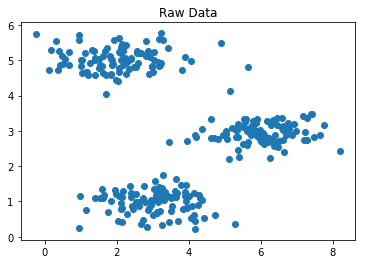

In [5]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

mat = scipy.io.loadmat('ex7data2.mat')
data = mat['X']
x1 = data[:, 0]
x2 = data[:, 1]

plt.scatter(x1, x2)
plt.title('Raw Data')
plt.show()

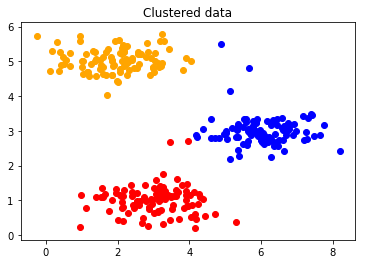

In [2]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, n_init=100)
km.fit(data)
clustered_x = km.predict(data)

plt.scatter(x1[clustered_x == 0], x2[clustered_x == 0], color='blue')
plt.scatter(x1[clustered_x == 1], x2[clustered_x == 1], color='orange')
plt.scatter(x1[clustered_x == 2], x2[clustered_x == 2], color='red')
plt.title('Clustered data')
plt.show()

### Image Compression

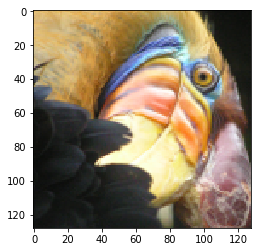

In [3]:
import imageio

image = imageio.imread('bird_small.png')
plt.imshow(image)
plt.show()

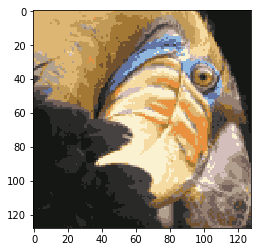

In [6]:
w, h, d = tuple(image.shape)
extended_image = image.reshape(w*h, d) / 255
n_colors = 16

image_km = KMeans(n_clusters=n_colors, n_init=10)
image_km.fit(extended_image)
clusters = image_km.predict(extended_image)
centroids = image_km.cluster_centers_

compressed_image = np.zeros((w, h, d))
label_position = 0
for i in range(w):
    for j in range(h):
        compressed_image[i][j] = centroids[clusters[label_position]]
        label_position += 1
        
plt.imshow(compressed_image)
plt.show()      


# Principal Component Analysis

### Example Dataset

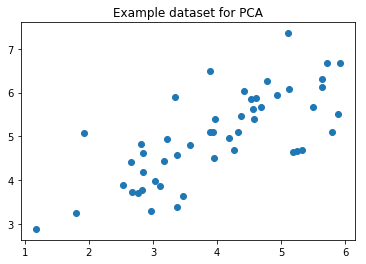

In [108]:
mat = scipy.io.loadmat('ex7data1.mat')
data = mat2['X']

plt.scatter(data[:, 0], data[:, 1])
plt.title("Example dataset for PCA")
plt.show()

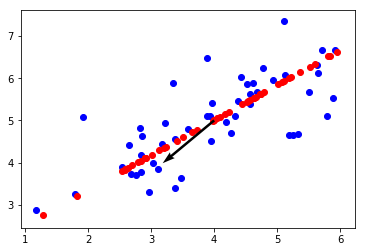

In [123]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(data)
transformed_data = pca.inverse_transform(pca.transform(data))
plt.scatter(data[:, 0], data[:, 1], color='blue')
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='red')

eigenvector = pca.components_
plt.quiver(4, 5, eigenvector[:,0], eigenvector[:,1], scale=5)
plt.show()